<a href="https://colab.research.google.com/github/jordan24cyber/project-yohathor/blob/main/Naive_Bayes_Thoriq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
MEMBACA DATASET

In [ ]:
# Load dataset
data = pd.read_csv("earthquake_alert_balanced_dataset.csv")

# Lihat 5 data pertama
display(data.head())

# Cek struktur data
data.info()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


CEK APAKAH ADA DATA YANG NULL DAN DUPLIKAT

In [ ]:
# Cek data kosong (null)
print("=== CEK DATA NULL ===")
print(data.isnull().sum())

# Cek duplikat
print("\nJumlah duplikat:", data.duplicated().sum())

# Hapus duplikat jika ada
data = data.drop_duplicates()

=== CEK DATA NULL ===
magnitude    0
depth        0
cdi          0
mmi          0
sig          0
alert        0
dtype: int64

Jumlah duplikat: 44


MEMISAHKAN FITUR DAN LABEL

In [ ]:
# Tentukan fitur dan label
X = data[['magnitude', 'depth', 'cdi', 'mmi', 'sig']]
y = data['alert']

# Encode label menjadi angka
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Cek hasil encoding
print("Contoh encoding:", list(zip(y[:5], y_encoded[:5])))

Contoh encoding: [('green', np.int64(0)), ('green', np.int64(0)), ('green', np.int64(0)), ('green', np.int64(0)), ('green', np.int64(0))]


BALANCING DATA MENGGUNAKAN SMOTE

In [ ]:
# Cek distribusi sebelum SMOTE
print("=== Distribusi Sebelum Balancing ===")
print(pd.Series(y_encoded).value_counts())

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Cek distribusi setelah SMOTE
print("\n=== Distribusi Setelah SMOTE ===")
print(pd.Series(y_resampled).value_counts())

# Gabungkan hasil ke dataframe
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['weather'] = le.inverse_transform(y_resampled)

# Simpan ke Excel
output_path = "earthquake_prediction_balance.xlsx"
balanced_data.to_excel(output_path, index=False)

=== Distribusi Sebelum Balancing ===
0    322
3    318
1    316
2    300
Name: count, dtype: int64

=== Distribusi Setelah SMOTE ===
0    322
3    322
1    322
2    322
Name: count, dtype: int64


  NORMALISASI DAN SPLIT DATA

In [ ]:
# Normalisasi fitur agar skala serupa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42
)

print("Data training:", X_train.shape)
print("Data testing:", X_test.shape)

Data training: (1030, 4)
Data testing: (258, 4)


MODEL NAIVE BAYES

In [ ]:
# Buat model Naive Bayes
model = GaussianNB()

# Latih model
model.fit(X_train, y_train)

print("Model berhasil dilatih ✅")

Model berhasil dilatih ✅


EVALUASI MODEL

=== HASIL EVALUASI ===
Akurasi: 63.18%

Classification Report:
               precision    recall  f1-score   support

       green       0.84      0.75      0.79        72
      orange       0.47      0.39      0.43        59
         red       0.59      0.86      0.70        63
      yellow       0.59      0.50      0.54        64

    accuracy                           0.63       258
   macro avg       0.62      0.62      0.62       258
weighted avg       0.63      0.63      0.62       258



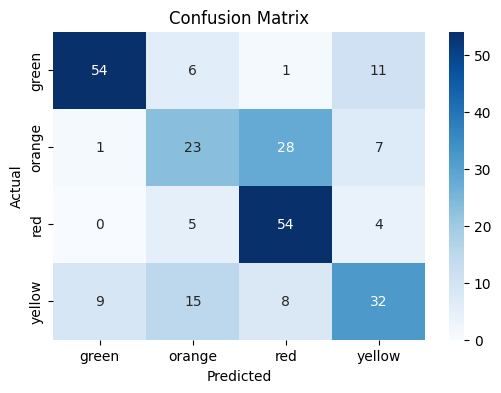

In [ ]:
# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi hasil
print("=== HASIL EVALUASI ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred)*100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix visual
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

PREDIKSI MANUAL - INPUT DARI USER

In [2]:
# Import library
import pandas as pd
import time  # BARU: Untuk menghitung waktu eksekusi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# BARU: Impor Naive Bayes, bukan Random Forest
from sklearn.naive_bayes import GaussianNB
# BARU: Impor metrik untuk evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

print("📊 Tabel Skala & Logika Bahaya Variabel Gempa (Versi Narasi)\n")

print("1. Magnitude (3.0 – 9.5)")
print("   Semakin tinggi nilai magnitude, semakin besar energi yang dilepaskan, sehingga potensi bahaya juga semakin besar.\n")

print("2. Depth (0 – 700 km)")
print("   Semakin dangkal pusat gempa (semakin dekat ke permukaan bumi), maka getaran di permukaan akan semakin kuat dan berbahaya.\n")

print("3. CDI (1 – 10)")
print("   Semakin tinggi nilai CDI (Community Determined Intensity), semakin banyak orang yang merasakan getaran kuat dari gempa.\n")

print("4. MMI (1 – 12)")
print("   Semakin tinggi nilai MMI (Modified Mercalli Intensity), semakin besar kemungkinan terjadinya kerusakan fisik di permukaan.\n")

print("5. SIG (-100 – 200)")
print("   Semakin tinggi nilai SIG (Significance), semakin signifikan dan luas dampak yang ditimbulkan oleh gempa.\n")

# === 1. Baca Dataset ===
data = pd.read_csv("earthquake_alert_balanced_dataset.csv")

# Pisahkan fitur (X) dan target (y)
X = data[['magnitude', 'depth', 'cdi', 'mmi', 'sig']]
y = data['alert']

# === 2. Encode Label (alert) ===
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === 3. Split data untuk training dan testing ===
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# === 4. Normalisasi (Scaling) ===
# Naive Bayes (Gaussian) berasumsi data terdistribusi normal,
# jadi StandardScaler adalah pilihan yang baik.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 5. Training Model (BARU: Gaussian Naive Bayes) ===
print("--- ⏱️ Memulai Training Model Naive Bayes ---")
start_time = time.time() # BARU: Catat waktu mulai

# BARU: Menggunakan GaussianNB()
model = GaussianNB()
model.fit(X_train_scaled, y_train)

end_time = time.time() # BARU: Catat waktu selesai
training_time = end_time - start_time # BARU: Hitung durasi training
print(f"--- ✅ Training Selesai dalam {training_time:.6f} detik ---")


# === 5b. BARU: Evaluasi Model pada Data Test ===
print("\n--- 📈 Evaluasi Model pada Data Test (Acuan) ---")
# Model memprediksi data test
y_pred = model.predict(X_test_scaled)

# Hitung metrik
# 'average='macro'' diperlukan untuk multi-class (green, orange, red)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)

# Tampilkan tabel ringkasan
print("\n" + "="*65)
print("--- RINGKASAN METRIK MODEL ACUAN (dari Data CSV) ---")
print(f"| Algoritma       | Akurasi (%) | Precision | Recall  | Waktu Training (S) |")
print(f"|-----------------|-------------|-----------|---------|--------------------|")
# BARU: Menampilkan hasil untuk Naive Bayes
print(f"| Naive Bayes     | {accuracy*100:11.2f} | {precision:9.4f} | {recall:7.4f} | {training_time:18.6f} |")
print("="*65)

# Tampilkan laporan klasifikasi lengkap
print("\n--- Laporan Klasifikasi Lengkap (Data Test) ---")
# 'target_names' menggunakan kelas asli dari LabelEncoder (cth: 'green', 'red')
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))
print("="*65)


# === 6. Input Manual dari Pengguna ===
# Bagian ini tidak perlu diubah, akan otomatis menggunakan model Naive Bayes
print("\n=== INPUT DATA GEMPA MANUAL ===")
magnitude = float(input("Masukkan kekuatan gempa (magnitude): "))
depth = float(input("Masukkan kedalaman gempa (km): "))
cdi = float(input("Masukkan nilai CDI (Community Determined Intensity): "))
mmi = float(input("Masukkan nilai MMI (Modified Mercalli Intensity): "))
sig = float(input("Masukkan nilai Significance (SIG): "))

# Buat DataFrame input
input_df = pd.DataFrame([[magnitude, depth, cdi, mmi, sig]],
                        columns=['magnitude', 'depth', 'cdi', 'mmi', 'sig'])

# Normalisasi input
input_scaled = scaler.transform(input_df)

# === 7. Prediksi Tingkat Peringatan ===
pred = model.predict(input_scaled)
pred_label = le.inverse_transform(pred)

print("\n🚨 Prediksi Tingkat Peringatan Gempa:")
print(f"➡ Hasil prediksi alert: {pred_label[0]}")

📊 Tabel Skala & Logika Bahaya Variabel Gempa (Versi Narasi)

1. Magnitude (3.0 – 9.5)
   Semakin tinggi nilai magnitude, semakin besar energi yang dilepaskan, sehingga potensi bahaya juga semakin besar.

2. Depth (0 – 700 km)
   Semakin dangkal pusat gempa (semakin dekat ke permukaan bumi), maka getaran di permukaan akan semakin kuat dan berbahaya.

3. CDI (1 – 10)
   Semakin tinggi nilai CDI (Community Determined Intensity), semakin banyak orang yang merasakan getaran kuat dari gempa.

4. MMI (1 – 12)
   Semakin tinggi nilai MMI (Modified Mercalli Intensity), semakin besar kemungkinan terjadinya kerusakan fisik di permukaan.

5. SIG (-100 – 200)
   Semakin tinggi nilai SIG (Significance), semakin signifikan dan luas dampak yang ditimbulkan oleh gempa.

--- ⏱️ Memulai Training Model Naive Bayes ---
--- ✅ Training Selesai dalam 0.011807 detik ---

--- 📈 Evaluasi Model pada Data Test (Acuan) ---

--- RINGKASAN METRIK MODEL ACUAN (dari Data CSV) ---
| Algoritma       | Akurasi (%) | Preci